# Import Required Libraries

In [21]:
import os
import re
import pydicom
import cv2
import gdcm
import zipfile
import numpy as np
from matplotlib import pyplot, image
from scipy import ndimage
from glob import glob
from shutil import rmtree

# Helper Functions 

In [3]:
def read_image_and_histogram(filepath):
    # Read grayscale DICOM image
    img = cv2.imread(filepath)
    # Calculate Histogram
    histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
    return img, histogram

In [4]:
def plot_image(image):
    imgplot = pyplot.imshow(image, cmap=pyplot.cm.bone)
    
def plot_histogram(histogram):
    # configure and draw the histogram figure
    pyplot.figure()
    pyplot.title("CT-Scan Histogram")
    pyplot.xlabel("grayscale value")
    pyplot.ylabel("pixels")
    pyplot.xlim([0, 256])
    # TODO: qual será o limite de y?
    pyplot.ylim([0, 5000])
    pyplot.plot(histogram)
    pyplot.show()

In [5]:
def find_biggest_contour(image):
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask 

# DICOM

In [32]:
dataset_dir = "/home/rodrigo/processed-dataset/"
dir_list = glob(dataset_dir + "[0-9]*")

def extract_dicom_zips(dataset_dir):
    count1 = 0
    zip_list = glob(dataset_dir + "zips/" + "*.zip")
    for filepath in zip_list:
      exam_number = re.findall(r'\d+', filepath)[-1]
      dcm_dir = dataset_dir + exam_number + "/dicoms/"
      png_dir = dataset_dir + exam_number + "/pngs/"
      os.makedirs(dcm_dir, exist_ok=True)  
      os.makedirs(png_dir, exist_ok=True)
      print(os.path.basename(filepath))
      with zipfile.ZipFile(filepath, "r") as zip_ref:
        zip_ref.extractall(dcm_dir)
      count1 = count1 + 1
      print(str(count1) + "/" + "491")

def move_dicoms_recursively(exam_dir):
    dicoms = glob(exam_dir + "/dicoms/**/*.dcm", recursive=True)
    count2 = 0
    dir = exam_dir + "/dicoms/"
    try:
        subdir = [dI for dI in os.listdir(dir) if os.path.isdir(os.path.join(dir,dI))][0]
        for filepath in dicoms:
            dicom_name = os.path.basename(exam_dir) + "-" + str(count2) + ".dcm" 
            os.rename(filepath, dir + dicom_name)
            count2 = count2 + 1
        print(str(count2) + "/" + str(len(dicoms)))
        rmtree(dir + subdir)
    except IndexError:
      print("No dicoms to move.")

        
# x = 0
# for exam_dir in dir_list:
#     move_dicoms_recursively(exam_dir)
#     print(str(x) + "/491")
#     x = x + 1
# extract_dicom_zips(dataset_dir)

396/396
0/491
288/288
1/491
288/288
2/491
288/288
3/491
293/293
4/491
712/712
5/491
578/578
6/491
380/380
7/491
148/148
8/491
540/540
9/491
286/286
10/491
325/325
11/491
648/648
12/491
558/558
13/491
53/53
14/491
324/324
15/491
76/76
16/491
229/229
17/491
32/32
18/491
578/578
19/491
297/297
20/491
288/288
21/491
51/51
22/491
67/67
23/491
64/64
24/491
810/810
25/491
283/283
26/491
241/241
27/491
288/288
28/491
576/576
29/491
421/421
30/491
32/32
31/491
288/288
32/491
288/288
33/491
624/624
34/491
87/87
35/491
252/252
36/491
1008/1008
37/491
64/64
38/491
294/294
39/491
288/288
40/491
288/288
41/491
32/32
42/491
324/324
43/491
360/360
44/491
50/50
45/491
422/422
46/491
324/324
47/491
324/324
48/491
288/288
49/491
293/293
50/491
49/49
51/491
288/288
52/491
544/544
53/491
468/468
54/491
316/316
55/491
53/53
56/491
324/324
57/491
288/288
58/491
315/315
59/491
86/86
60/491
36/36
61/491
299/299
62/491
422/422
63/491
49/49
64/491
288/288
65/491
297/297
66/491
299/299
67/491
306/306
68/491
288/2

In [ ]:
# def generate_pngs(exam_dir):
#     gdcmconv --raw CT000024.dcm teste.dcm
#     dcm2pnm +on +Sxv 300 +Wi 1  CT000024.dcm test.png

# Plot Before Image Processing

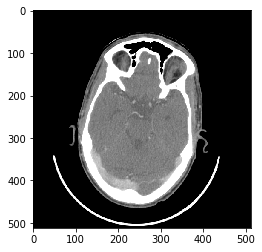

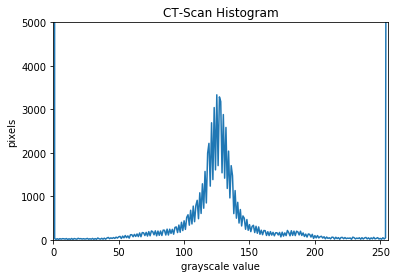

In [6]:
# img, histogram = read_image_and_histogram(filepath)
# plot_image(img)
# plot_histogram(histogram)

# Image Processing

In [7]:
# # Remove skull/ventricle pixels (TODO: Optimize this)
# img[np.where((img >= [255,255,255]).all(axis = 2))] = [0,0,0]
# img[np.where((img <= [100,100,100]).all(axis = 2))] = [0,0,0]
# # Apply Median filter
# img = ndimage.median_filter(img, 10)

In [8]:
# # Remove soft tissues
# imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret,thresh = cv2.threshold(imgray, 100, 255, 0)
# biggest_contour, mask = find_biggest_contour(thresh)
# biggest_contour_image = np.bitwise_and(imgray, mask, mask)

In [10]:
# # Global Threshold
# # TODO: maybe get a average value for normal cerebral mass pixel color to use on threshold lower limit
# ret2, otsu_thresh = cv2.threshold(biggest_contour_image, 145, 255, cv2.THRESH_BINARY)
# final_image = np.bitwise_and(imgray, otsu_thresh, otsu_thresh)

In [11]:
# # Write Processed Image (TODO: use this on memory)
# processed_filepath = directory + 'processed-' + filename
# cv2.imwrite(processed_filepath, otsu_thresh)

True

# Plot After Image Processing

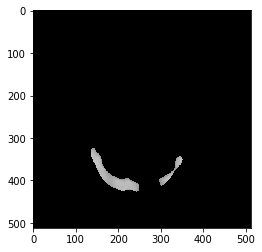

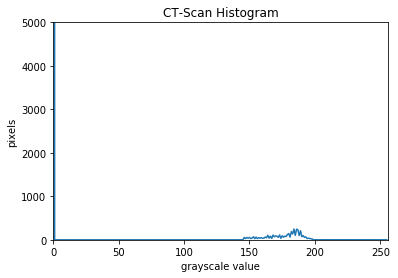